In [30]:
import matplotlib.pyplot as plt
import csv
import matplotlib.cm as cm
import numpy as np
from sklearn import datasets


In [31]:
%matplotlib inline

In [335]:
def showIter(iteration, folder):
    iteration = str(iteration)
    file = folder + 'labels-' + iteration
    data = []
    labels = []
    predicted_labels = []
    with open(file, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            data.append(row[:-1])
            predicted_labels.append(int(row[-1]))

    with open(label_file, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            labels.append(int(row[0]))

    centroid_file = folder + 'contCentroid' + iteration
    centroids = []
    with open(centroid_file, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            centroids.append(list(map(lambda x:float(x), row)))
    centroids = np.array(centroids)
    
    n_samples = 1000
    x = list(map(lambda d: float(d[0]), data[:n_samples]))
    y = list(map(lambda d: float(d[1]), data[:n_samples]))
    predicted_z = predicted_labels[:n_samples]
    z = labels[:n_samples]

    colors = cm.rainbow(np.linspace(0, 1, 50))
    predicted_c = list(map(lambda z: colors[z - 1], predicted_z))
    
    fig = plt.figure()
    axe1 = fig.add_axes([0,0,1,1])
    axe1.scatter(x,y, c=predicted_c)
    axe1.scatter(centroids[:,0], centroids[:,1], c='black',marker="s")
    
    size = int(np.sqrt(len(centroids)))
   
    for i in range(size):
        for j in range(size):
            current = i*size + j
            neighbors = [(i + 1) * size + j, i * size + j + 1]
            
            if i != size - 1:
                pair1 = [current, neighbors[0]]
                axe1.plot(centroids[pair1,0], centroids[pair1,1], c='black')
        
            if j != size - 1:
                pair2 = [current, neighbors[1]]
                axe1.plot(centroids[pair2,0], centroids[pair2,1], c='black')
    fig.savefig('iter'+str(iteration)+".png", format='png', dpi=1000)
            

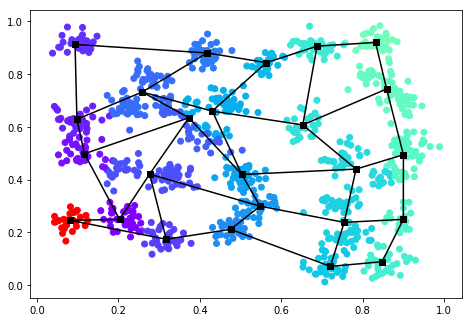

In [349]:
showIter(50,'../out/exp Thu Aug 30 13:36:36 CEST 2018/')

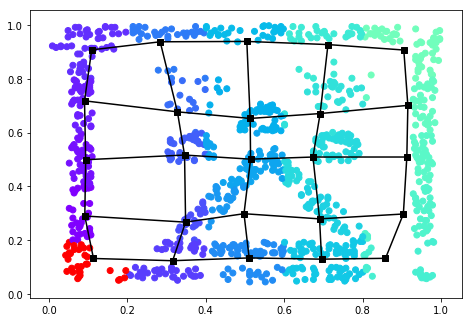

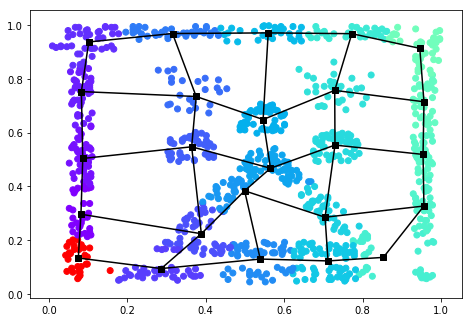

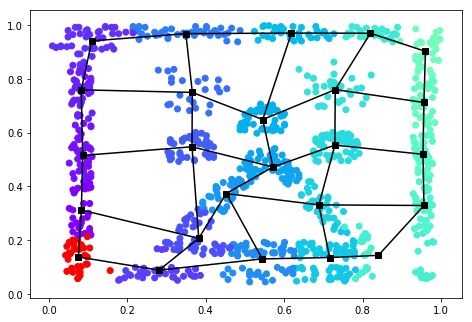

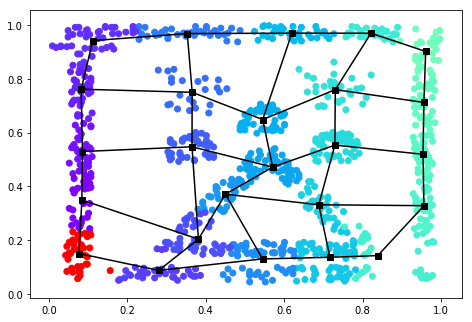

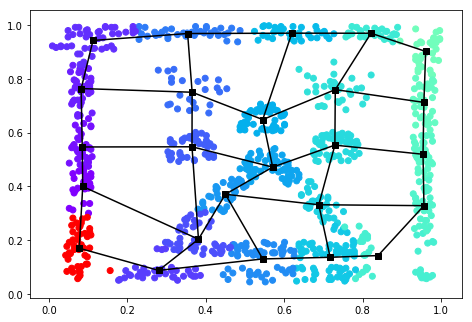

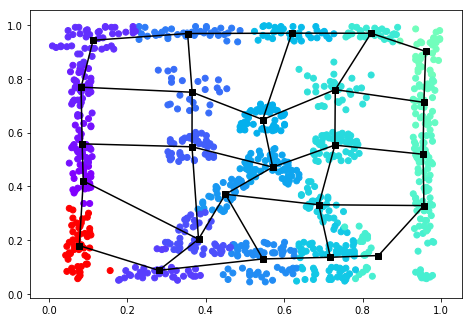

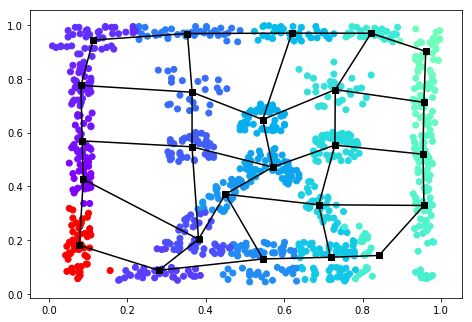

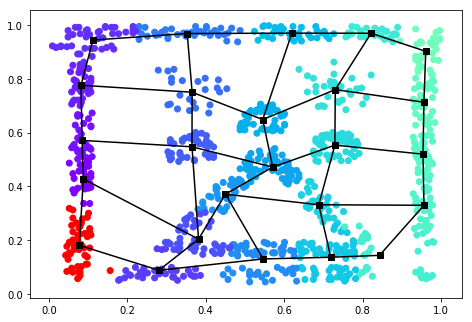

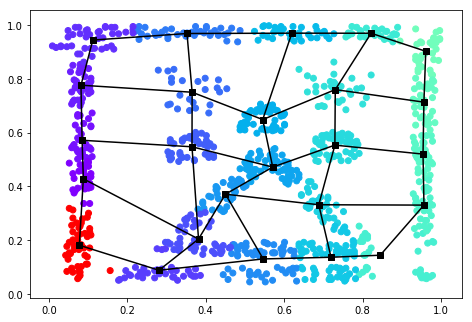

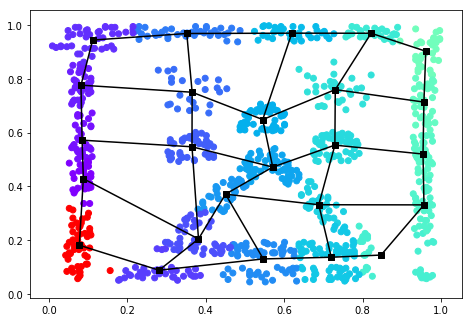

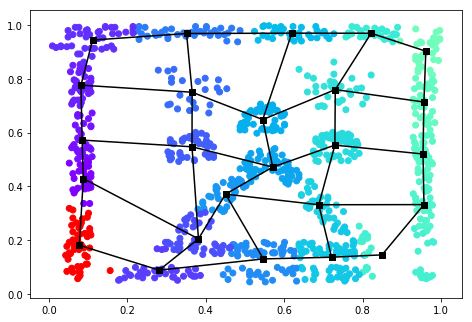

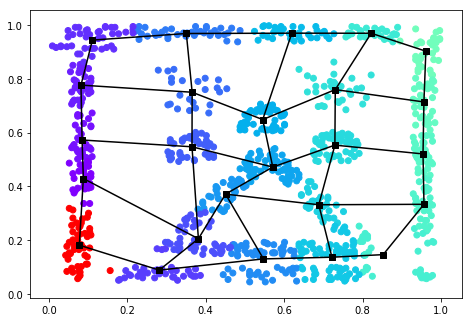

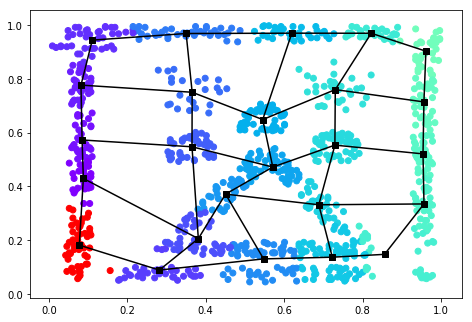

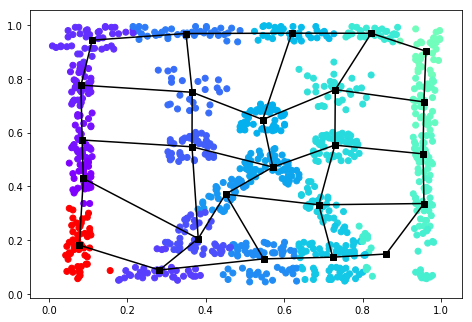

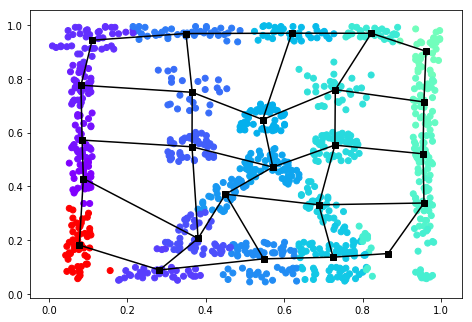

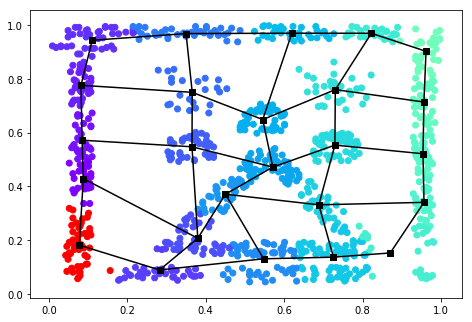

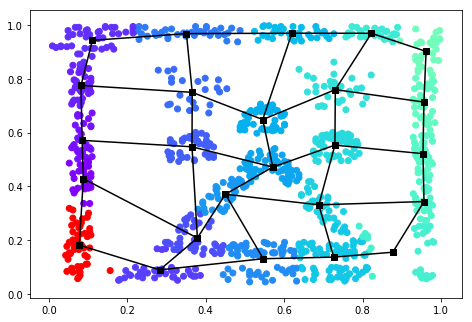

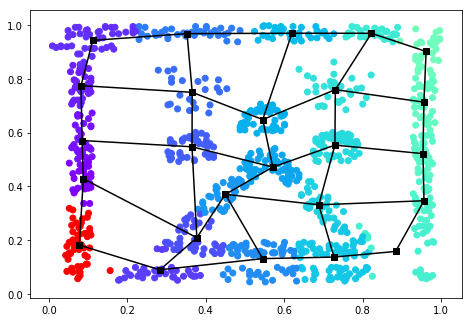

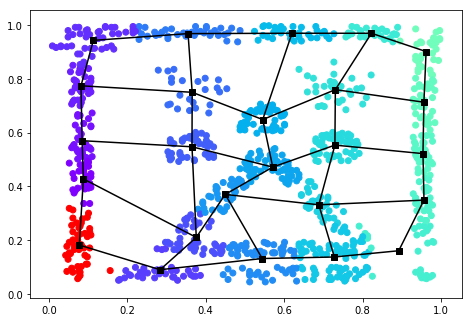

In [337]:
for i in range(1, 201, 11):
    showIter(i,'../out/exp Thu Aug 30 10:22:01 CEST 2018/')

In [322]:
for i in range(1, 201, 11):
    print(i)

1
12
23
34
45
56
67
78
89
100
111
122
133
144
155
166
177
188
199
